# Comparing Means


|Goal|$H_{0}$|Data Needed|Parametric Test|Assumptions*|Non-parametric Test|  
|---|---|---|---|---|---|  
|Compare observed mean to theoretical one|$\mu_{obs} = \mu_{th}$|array-like of observed values & float of theoretical|One sample t-test: scipy.stats.ttest_1samp|Normally Distributed\*\*|One sample Wilcoxon signed rank test|   
|Compare two observed means (independent samples)|$\mu_{a} = \mu_{b}$|2 array-like samples|Independent t-test (or 2-sample): scipy.stats.ttest_ind|Independent, Normally Distributed\*\*, Equal Variances\*\*\*|Mann-Whitney's test|   
|Compare several observed means (independent samples)|$\mu_{a} = \mu_{b} = \mu_{n}$|n array-like samples|ANOVA: scipy.stats.f_oneway|Independent, Normally Distributed\*\*, Equal Variances|Kruskal-Wallis test|   

\*If assumptions can't be met, the equivalent non-parametric test can be used.   
\*\*Normal Distribution assumption can be be met by having a large enough sample (due to Central Limit Theorem), or the data can be scaled using a Gaussian Scalar.   
\*\*\*The argument in the stats.ttest_ind() method of `equal_var` can be set to `False` to accomodate this assumption.   

## One Sample T-Test

Goal: Compare observed mean to theoretical one. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} = \mu_{th}$|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} >= \mu_{th}$|  
|Null Hypothesis|$H_{0}$|$\mu_{obs} <= \mu_{th}$|  


||||
|-----|-----|---------|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{obs} \ne \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly smaller)|$H_{a}$|$\mu_{obs} < \mu_{th}$|  
|Alternative Hypothesis (1-tail, significantly larger)|$H_{a}$|$\mu_{obs} > \mu_{th}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions: Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  

5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`. 

6. Decide. For a 2-tailed test, we take the p-value as is. For a 1-tailed test, we evaluate $p/2 < \alpha$ and $t > 0$ (to test if higher), and of a less-than test when $p/2 < \alpha$ and $t < 0$.  

### Example 1

I believe customers who churn are charged more (monthly average) than the overall average monthly charges.  
Is the mean of monthly charges of customers who churn significantly higher than the mean across all customers? 

We will use a 1-tailed ("significantly higher"), 1-sample (comparing 1 group to the average) t-test.  

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv("Cust_Churn_Telco.csv")  

**A. Plot Distribution**

<AxesSubplot:>

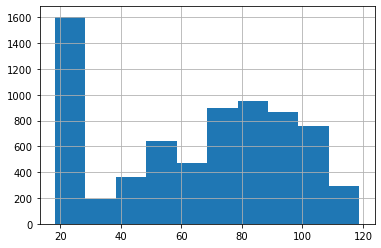

In [7]:
df['MonthlyCharges'].hist()

<AxesSubplot:>

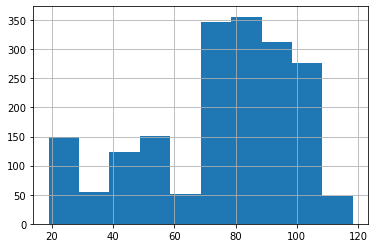

In [9]:
churn_sample = df[df.Churn=='Yes'].MonthlyCharges

churn_sample.hist()

How many observations do we have?

In [11]:
df.shape

(7043, 21)

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers  

**C. Set Alpha**

In [12]:
alpha = .05

**D. Verify Assumptions**

In [13]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Our churn sample is large enough, as is overall count, to meet the assumptions of normal distributions. 

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate $p/2 < \alpha$  and  $t > 0$. 

In [15]:
churn_sample = df[df.Churn=='Yes'].MonthlyCharges
churn_sample

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

In [16]:
overall_mean = df.MonthlyCharges.mean()
overall_mean

64.76169246059922

In [24]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)

print("T statistic:", t)
print("p-value:", p/2)
print("alpha:", alpha)

T statistic: 16.965403080505645
p-value: 1.8703196496920532e-60
alpha: 0.05


In [28]:
print("Is p-value significant?", p/2 < alpha)
print("Is t-statistic greater than 0?", t > 0)

Is p-value significant? True
Is t-statistic greater than 0? True


**F. Decide**

Is $\frac{1}{2} p < \alpha$ AND $t > 0$? 

Is $t > 0$ and $p/2 < \alpha$?

In [38]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$. \n In fact, the charges of churned customers are significantly less than overall customers.")
else:
    print("We reject $H_{0}.")
    print("Mean monthly charges of churned customers is greater that charges across all customers.")

We reject $H_{0}.
Mean monthly charges of churned customers is greater that charges across all customers.


## Example 2

**A. Distributions** See above

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers  
$H_{a}$: Mean of monthly charges of churned customers != Mean of monthly charges of all customers. 

**C. Set Alpha** See above  

**D. Assumptions** See above  

**E. Compute test statistics**

In [29]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p

(16.965403080505645, 3.7406392993841064e-60)

**F. Is p-value less than alpha?**

In [33]:
print("Is p < alpha?", p < alpha)

Is p < alpha? True


Mean monthly charges of churned customers is signicantly diferently than the overall mean of monthly charges.

## Example 3

**A. Distributions** See above

**B. Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers.  
$H_{a}$: Mean of monthly charges of churned customers < Mean of monthly charges of all customers. 

**C. Set Alpha** See above  

**D. Assumptions** See above  

**E. Compute test statistics**

In [34]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
print("T-statistic", t)
print("P-value:", p)

T-statistic 16.965403080505645
P-value: 3.7406392993841064e-60


**F. Decide**

Is 1/2 of p-value < alpha AND t-stat < 0? 

In [35]:
print("Is the test statistic less than 0?", t < 0)
print("Is the p-value less than alpha?", p/2 < alpha)

Is the test statistic less than 0? False
Is the p-value less than alpha? True


In [37]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$. \n In fact, the charges of churned customers are significantly higher than overall customers.")
else:
    print("We reject $H_{0}.")
    print("Mean monthly charges of churned customers is less than charges across all customers.")

We reject $H_{0}.
Mean monthly charges of churned customers is less than charges across all customers.


## Independent T-Test (a.k.a. Two Sample T-Test)

Goal: Compare mean of group a to mean of group b. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b}$|  
|Alternative Hypothesis (2-tail, significantly different)|$H_{a}$|$\mu_{a} \ne \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly smaller than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|  
|Alternative Hypothesis (1-tail, a is significantly larger than b)|$H_{a}$|$\mu_{a} < \mu_{b}$|      

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions:  
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  
    - Independent samples  
    - Equal Variances (or set method argument to False when not  


5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.ttest_1samp`

6. Decide. 

### Example 1

I believe customers who churn are charged more (monthly average) than customers who don't churn. 
Is the mean of monthly charges of customers who churn significantly higher than the mean of those who don't churn? 

We will use a 1-tailed ("significantly higher"), 1-sample (comparing 1 group to the average) t-test.  

<AxesSubplot:>

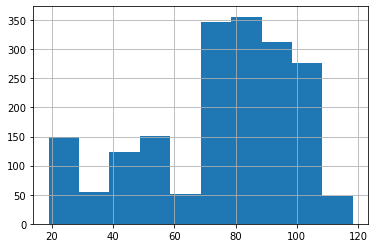

In [43]:
churn_sample = df[df.Churn=='Yes'].MonthlyCharges

churn_sample.hist()

In [48]:
churn_sample.mean()

74.4413322632423

<AxesSubplot:>

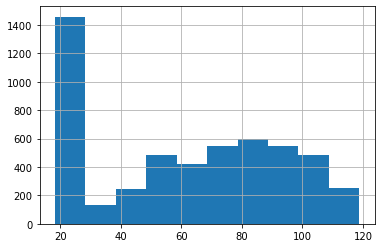

In [44]:
no_churn_sample = df[df.Churn=='No'].MonthlyCharges

no_churn_sample.hist()

In [47]:
no_churn_sample.mean()

61.2651236953999

**Set Hypothesis**

$H_{0}$: Mean of monthly charges of churned customers = Mean of monthly charges of customers who haven't churned  
$H_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of customers who haven't churned  

**Set Alpha**

In [68]:
alpha = .05

**Verify Assumptions**

1. Independent Samples (n.a. for 1-sample t-test). YES! no observations in the churn sample exist in the no-churn sample. 

2. Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT).  YES! Plenty of observations

3. Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [45]:
print("Variance for churn sample:", churn_sample.var())
print("Variance for no churn sample:", no_churn_sample.var())

Variance for churn sample: 608.4141833954304
Variance for no churn sample: 966.7527670734287


NO! so we will set the argument of equal_var to False. 

**Compute Test Statistic**

In [46]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var = False)
print("T-statistic:", t)
print("P-value:", p/2)

T-statistic: 18.407526676414673
P-value: 4.2962246657737696e-73


**Decide**

In [49]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [50]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


## Example 2

Are charges of customers who churn *significantly different* than those who do not churn? 

$H_{0}$: charges of customers who churn equals that of those who don't churn.   

$H_{a}$: charges of customers who churn is not equal to that of those who don't churn. 

In [79]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p

(18.407526676414673, 8.592449331547539e-73)

**Decide**

Is the p-value less than alpha?

In [52]:
print("Reject null?", p < alpha)

Reject null? True


## Example 3

Are charges of customers who churn *significantly less* than those who do not churn? 

$H_{0}$: mean charges of customers who churn equals that of those who don't churn.   

$H_{a}$: mean charges of customers who churn is less than that of those who don't churn. 

In [53]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p/2

(18.407526676414673, 4.2962246657737696e-73)

**Decide**

is t < 0? AND is p/2 < alpha?


In [54]:
print("Is t < 0? ", t<0)

print("is p/2 < alpha? ", p/2<alpha)

Is t < 0?  False
is p/2 < alpha?  True


## ANOVA Analysis of Variance

Goal: Compare means of groups a, b & c. 

1. Plot Distributions (i.e. Histograms!)  

2. Establish Hypotheses   

||||  
|-----|-----|---------|  
|Null Hypothesis|$H_{0}$|$\mu_{a} == \mu_{b} == \mu_{c}$|  
|Alternative Hypothesis (significantly different)|$H_{a}$|$\mu_{a} != \mu_{b} != \mu_{c}$|  

3. Set Significance Level: $\alpha = .05$

4. Verify Assumptions:  
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  
    - Independent samples  
    - Equal Variances


5. Compute test statistic and probability (t-statistic & p-value) using `scipy.stats.f_oneway`

## Example 1

Is the sepal length significantly different across the different species of iris? 

In [56]:
df = sns.load_dataset('iris')
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [57]:
df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [59]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length

In [60]:
versicolor_sepal_length.mean()

5.936

In [61]:
virginica_sepal_length.mean()

6.587999999999998

In [62]:
setosa_sepal_length.mean()

5.005999999999999

**A. Plot Distribution**  

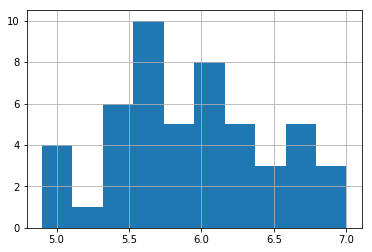

In [86]:
versicolor_sepal_length.hist()

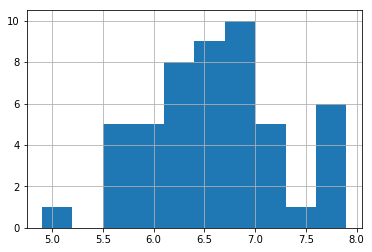

In [87]:
virginica_sepal_length.hist()

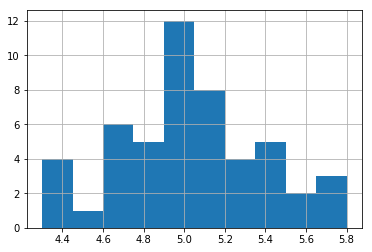

In [88]:
setosa_sepal_length.hist()

**B. State Hypotheses**

$H_{0}$: population means of the sepal length for the three species, versicolor, virginica & setosa, are all equal.  

$H_{a}$: population means of the sepal length for the three species, versicolor, virginica & setosa, are NOT all equal. 

**C. Set Significance Level**

In [89]:
alpha = .05

**D. Verify Assumptions**

- Independent samples: YES!  
- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT). YES! the distributions are mostly normal  
- Equal Variances: YES! The variance is very small so the differences are minor. 

In [90]:
print(versicolor_sepal_length.var())
print(virginica_sepal_length.var())
print(setosa_sepal_length.var())

0.2664326530612245
0.4043428571428573
0.12424897959183677


**E. Compute test statistics**

In [63]:
f, p = stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)
f, p

(119.26450218450472, 1.6696691907693648e-31)

**F. Decide**

In [64]:
if p < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


In [65]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

### Example 2

In [66]:
df = sns.load_dataset('mpg')
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [67]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Drop nulls

In [69]:
df = df[~df['horsepower'].isna()]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [70]:
usa_hp = df[df.origin == 'usa'].horsepower
japan_hp = df[df.origin == 'japan'].horsepower
eu_hp = df[df.origin == 'europe'].horsepower

In [71]:
usa_hp.mean()

119.04897959183674

In [72]:
japan_hp.mean()

79.83544303797468

In [73]:
eu_hp.mean()

80.55882352941177

**Plot Distribution**

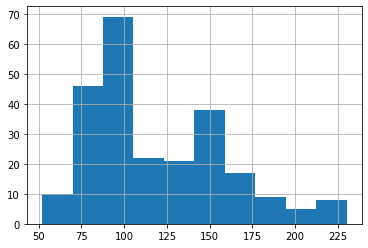

In [79]:
usa_plot = usa_hp.hist()

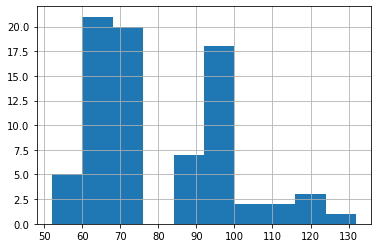

In [78]:
japan_plot = japan_hp.hist()

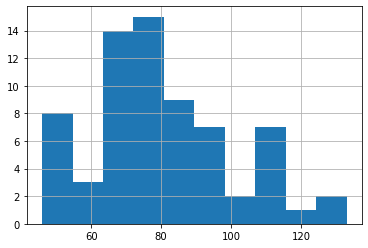

In [77]:
europle_plot = eu_hp.hist()

**Hypothesis**

$H_{0}$: hp is the same across all origins

$H_{a}$: hp is not the same across all origins

**Significance Level**

$\alpha$ is already set to .05

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: ?

In [80]:
usa_hp.var()

1591.8336567413864

In [81]:
japan_hp.var()

317.5238558909445

In [82]:
eu_hp.var()

406.3397717295875

Looking at the variances, they are very different, so I will move to a 2-sample, independent t-test comparing usa made cars vs. non-usa made cars. 

In [83]:
usa_hp = df[df.origin == 'usa'].horsepower
non_usa_hp = df[df.origin != 'usa'].horsepower

**Hypothesis**

$H_{0}$: usa origin cars' hp equals non-usa origin cars' hp

$H_{a}$: usa origin cars' hp does not equal non-usa origin cars' hp

**Significance Level**

$\alpha$ is already set to .05

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: ?

In [84]:
print(usa_hp.var())
print(non_usa_hp.var())

1591.8336567413864
356.2380020501352


In [85]:
t, p = stats.ttest_ind(usa_hp, non_usa_hp, equal_var = False)
t, p

(13.017135027378012, 3.384733024288272e-32)

**Decide**

is p-value less than alpha? 

In [123]:
p < alpha

True

Reject null hypothesis. The hp of usa cars vs. non-usa cars is significantly different. 

Do a mann-whitney non-parametric test for the comparison above, just in case our data wasn't normal enough.

In [87]:
stats.mannwhitneyu(usa_hp, non_usa_hp)

MannwhitneyuResult(statistic=6857.0, pvalue=4.754409073729524e-25)

In [86]:
stats.kruskal(usa_hp, japan_hp, eu_hp)

KruskalResult(statistic=105.59475799843663, pvalue=1.1759521262123952e-23)

Using Kruskal-Wallis test, non-parametric test for ANOVA, also shows us that the mean HP of the cars from the 3 origins is significantly different. 

__________________________________

## Example x

$H_{0}$: there is no difference in mpg of cars made in japan vs. europe.  

$H_{a}$: there IS a difference in mpg of cars made in japan vs. europe. 

In [127]:
j_mpg = df[df.origin == 'japan'].mpg

e_mpg = df[df.origin == 'europe'].mpg

**Distribution plot**

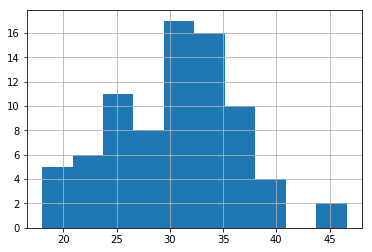

In [128]:
j_mpg.hist()

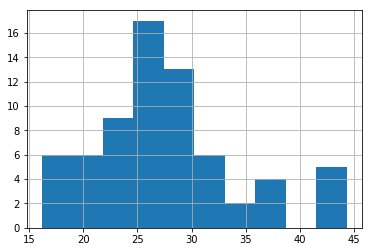

In [129]:
e_mpg.hist()

In [130]:
j_mpg.var()

37.08868549172348

In [131]:
e_mpg.var()

43.298797190518

In [139]:
t, p = stats.ttest_ind(j_mpg, e_mpg)
t, p

(2.723324735392516, 0.007256875026960007)

In [140]:
p < alpha

True

Reject the $H_{0}$, i.e. there is a significant difference in mpg in cars from japan vs. europe. 

### Example

$H_{0}$: there is no difference in horsepower of cars made in japan vs. europe.  

$H_{a}$: there IS a difference in horsepower of cars made in japan vs. europe. 

In [143]:
t, p = stats.ttest_ind(japan_hp, eu_hp)
t, p

(-0.23093695241338835, 0.8176893173506833)

In [144]:
p < alpha

False

Fail to reject our $H_{0}$, i.e. there is no significant difference in the hp or cars made in japan vs. europe. 